In [28]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [29]:
with open("./background_colors_json/lamdba/templates_features_lambda_rgb.json", mode="r") as f:
    datas = json.load(f)

In [30]:
def sort_colors(colors, reverse=False):
    colors.sort(key=lambda c: c[2], reverse=reverse)
    colors.sort(key=lambda c: c[1], reverse=reverse)
    colors.sort(key=lambda c: c[0], reverse=reverse)
    return colors

def sort_colors_by_variance(colors):
    colors_np = np.array(colors)
    variances = np.var(colors_np, axis=1)
    sorted_indices = np.argsort(variances)[::-1]
    sorted_colors = colors_np[sorted_indices,:]
    return sorted_colors.tolist()

def quantization_colors(colors):
    colors_np = np.array(colors)
    colors_np = colors_np // 5 * 5 + 5
    return colors_np.tolist()

In [31]:
colors = []

for data in datas:
    colors.append(data['colors'])
    # colors.append(quantization_colors(data['colors']))
    # colors.append(sort_colors(data['colors'], reverse=True))
    # colors.append(sort_colors_by_variance(data['colors']))

In [32]:
colors_np = np.array(colors)

In [33]:
colors_12dim = colors_np.reshape(-1,12)

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np

def plot_3D_PCA(data, labels=None, label_names=None):
    
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(data)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        indices = np.where(labels == label)
        ax.scatter(reduced_data[indices, 0], reduced_data[indices, 1], reduced_data[indices, 2], 
                   label=label_names[label] if label_names else f'Label {label}')

    ax.set_title('3D PCA')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    # Adding the legend
    ax.legend(loc='upper right')

    plt.show()

# Example usage:
# Assume 'data' is your data matrix of shape (n_samples, n_features)
# and 'labels' is an array of shape (n_samples,) containing the label index for each sample
# and 'label_names' is a list of label names, indexed by the label indices
# plot_3D_PCA(data, labels=labels, label_names=label_names)


In [35]:
from collections import Counter

def print_label_counter(labels):    
    label_counter = Counter(labels)
    print(dict(label_counter))

In [36]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=5).fit(colors_12dim)
labels = clustering.labels_
print_label_counter(labels)

{-1: 8405, 0: 23}


In [37]:
import hdbscan

clustering = hdbscan.HDBSCAN(min_cluster_size=20).fit(colors_12dim)
labels = clustering.labels_
print_label_counter(labels)

{-1: 4780, 11: 2683, 3: 172, 5: 76, 1: 30, 4: 95, 8: 49, 10: 121, 2: 167, 0: 75, 7: 105, 6: 52, 9: 23}


In [38]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=10).fit(colors_12dim)
labels = clustering.labels_
print_label_counter(labels)

{-1: 7666, 37: 29, 24: 17, 25: 12, 20: 14, 22: 15, 46: 16, 47: 31, 42: 19, 43: 10, 36: 25, 14: 13, 5: 15, 33: 23, 12: 28, 16: 16, 23: 24, 32: 15, 17: 10, 18: 19, 10: 11, 28: 22, 30: 20, 6: 13, 31: 15, 44: 31, 29: 13, 3: 13, 15: 11, 41: 18, 13: 13, 7: 20, 26: 11, 9: 13, 8: 14, 40: 12, 35: 13, 19: 10, 11: 16, 4: 16, 1: 10, 21: 10, 38: 12, 27: 10, 2: 17, 0: 11, 39: 10, 34: 13, 45: 13}


/home/mlfavorfit/anaconda3/envs/kjg_ver39/lib/python3.9/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [39]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=10).fit(colors_12dim)
labels = clustering.labels_
print_label_counter(labels)

{5: 1213, 2: 1117, 8: 698, 7: 876, 1: 1879, 4: 234, 0: 1045, 9: 282, 6: 594, 3: 490}


In [40]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(preference=-9e5).fit(colors_12dim)
labels = clustering.labels_
print_label_counter(labels)

{10: 419, 36: 356, 40: 317, 19: 217, 13: 186, 35: 416, 3: 173, 18: 131, 1: 246, 37: 87, 33: 218, 17: 104, 44: 267, 24: 250, 6: 213, 29: 410, 4: 76, 26: 84, 27: 92, 0: 71, 22: 189, 2: 163, 16: 446, 28: 287, 31: 82, 21: 174, 38: 193, 11: 211, 30: 237, 41: 86, 20: 190, 39: 163, 32: 89, 8: 117, 9: 95, 15: 122, 42: 228, 43: 84, 34: 100, 12: 94, 7: 141, 14: 102, 23: 98, 5: 181, 25: 223}


In [41]:
from sklearn.cluster import MeanShift

clustering = MeanShift().fit(colors_12dim)
labels = clustering.labels_
print_label_counter(labels)

{0: 8428}


In [510]:
from sklearn.mixture import GaussianMixture
import numpy as np

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(colors_12dim) for n in n_components]
bics = [model.bic(colors_12dim) for model in models]
best_n = n_components[np.argmin(bics)]

clustering = GaussianMixture(n_components=best_n).fit(colors_12dim)
labels = clustering.predict(colors_12dim)
print_label_counter(labels)

{5: 182, 7: 202, 8: 29, 4: 59, 9: 64, 3: 78, 0: 104, 2: 67, 1: 141, 6: 89}


In [42]:
# 클러스터 개수 직접 입력

cluster_num = 8

In [43]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=cluster_num).fit(colors_12dim)
labels = clustering.labels_
print_label_counter(labels)

/home/mlfavorfit/anaconda3/envs/kjg_ver39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: 1423, 7: 1079, 2: 2249, 4: 730, 5: 632, 1: 586, 3: 812, 6: 917}


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=19, n_init=8),
                 k=(3, 20))

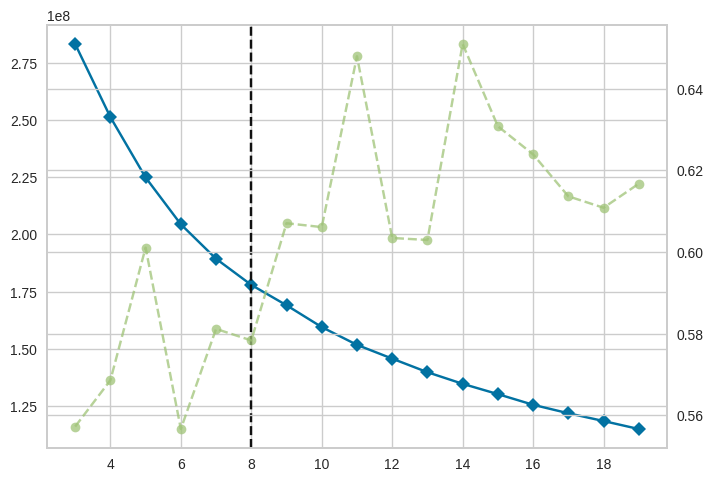

In [44]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=8)
# model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3, 20))
visualizer.fit(colors_12dim)

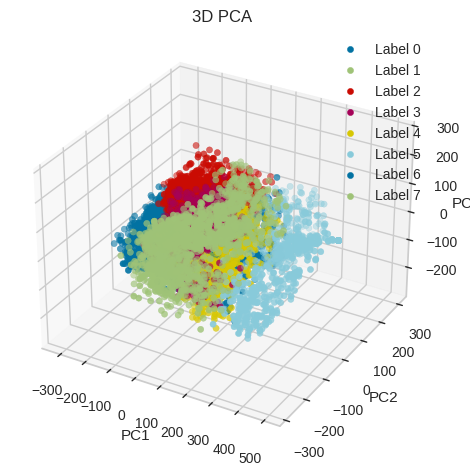

In [45]:
plot_3D_PCA(colors_12dim, labels)

In [46]:
from collections import defaultdict
label_template_dict = defaultdict(list)

for idx, label in enumerate(labels):
    label_template_dict[label].append(idx)

label_template_dict = dict(label_template_dict)

In [47]:
import sys, os
current_dir = os.path.dirname(os.path.realpath("__file__"))
sys.path.append(os.path.join(current_dir, '.'))
sys.path.append(os.path.join(current_dir, '..'))

In [48]:
from utils.data_utils import load_templates_dict
template_dict = load_templates_dict()

errors occured 0 times


In [49]:
def visualize_rgb_colors(bgr_colors):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Loop through the list of BGR colors and plot each one
    for i, color in enumerate(bgr_colors):
        rgb_color = [x / 255.0 for x in color]
        
        # Create a rectangle filled with the normalized RGB color
        rect = plt.Rectangle((i, 0), 1, 1, facecolor=rgb_color)
        
        # Add the rectangle to the plot
        ax.add_patch(rect)

    # Set axis limits and aspect ratio
    ax.set_xlim(0, len(bgr_colors))
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')

    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the plot
    plt.show()

# visualize_bgr_colors([[35, 69, 99], [41, 55, 64], [96, 159, 183], [101, 141, 167]])

from PIL import Image
def visualize_n_templates(top_n_template_id):
    for x, template_id in enumerate(top_n_template_id):
        template_path = template_dict[template_id]
        template_image = Image.open(template_path)

        plt.subplot(1, len(top_n_template_id), x + 1)
        plt.axis('off')
        plt.imshow(template_image)

    plt.show()

Label: 0 / Number of template: 1423


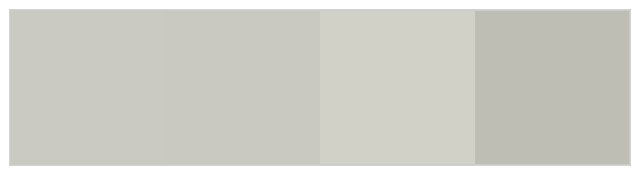

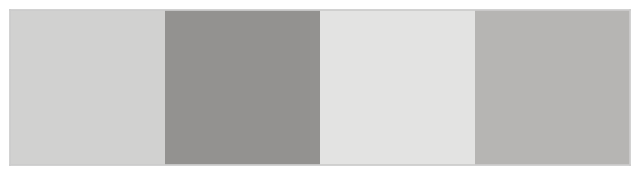

1583 [[209, 209, 208], [147, 146, 144], [227, 227, 226], [182, 181, 179]]


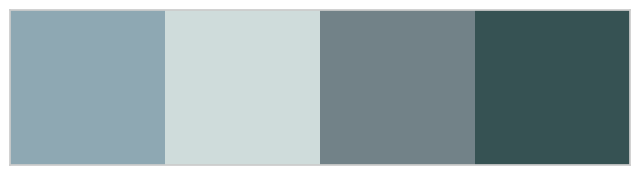

5220 [[142, 168, 179], [207, 220, 219], [114, 130, 136], [54, 82, 83]]


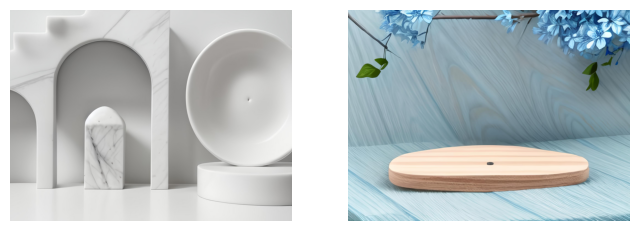

Label: 7 / Number of template: 1079


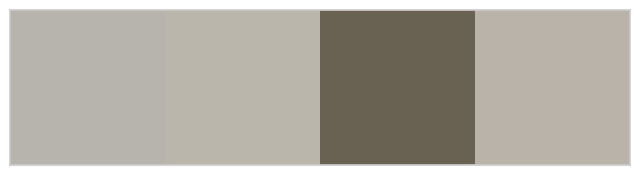

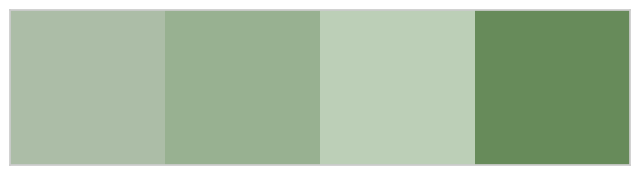

5677 [[172, 189, 167], [152, 177, 145], [188, 207, 183], [103, 139, 90]]


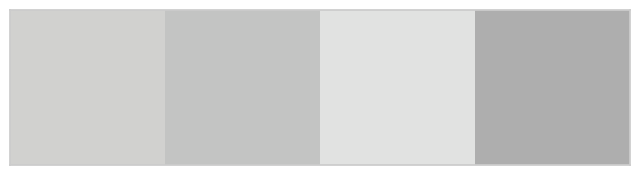

3637 [[209, 209, 207], [195, 196, 195], [225, 226, 225], [174, 174, 174]]


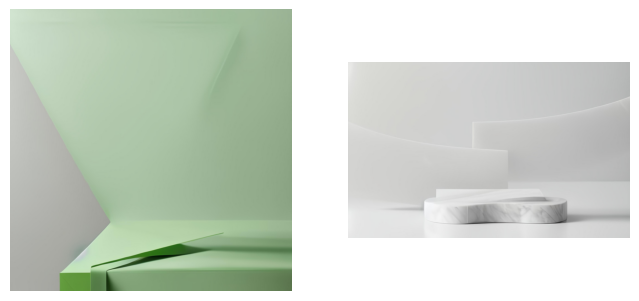

Label: 2 / Number of template: 2249


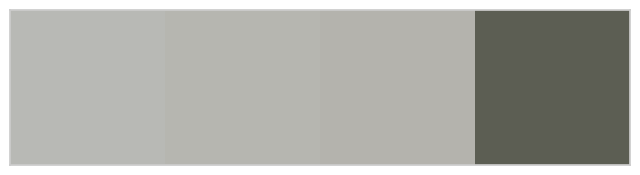

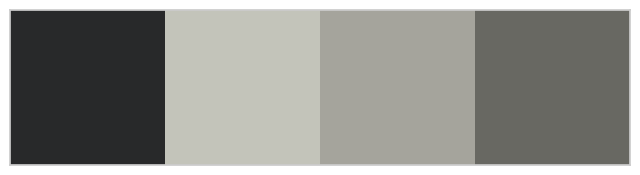

2856 [[40, 41, 42], [195, 196, 186], [165, 164, 156], [104, 104, 98]]


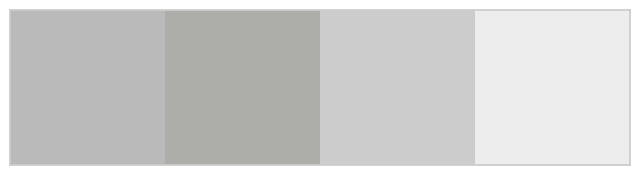

2484 [[187, 186, 186], [173, 174, 170], [205, 204, 204], [236, 237, 236]]


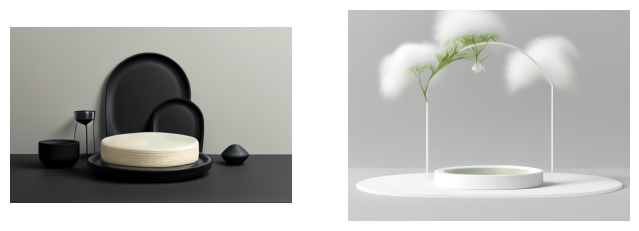

Label: 4 / Number of template: 730


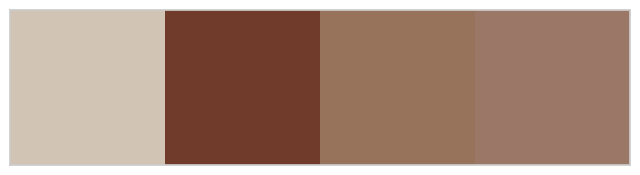

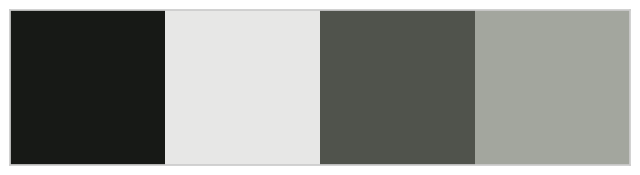

4086 [[23, 25, 22], [231, 231, 230], [80, 83, 76], [163, 166, 158]]


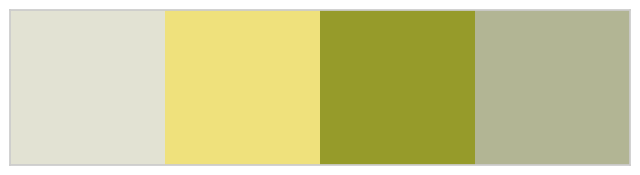

8235 [[226, 226, 211], [239, 225, 124], [150, 155, 42], [178, 181, 148]]


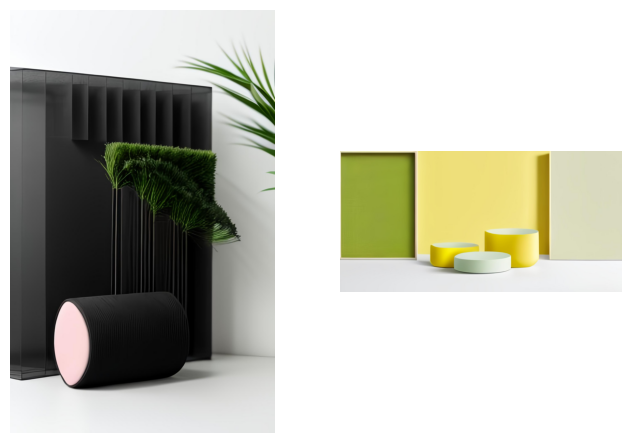

Label: 5 / Number of template: 632


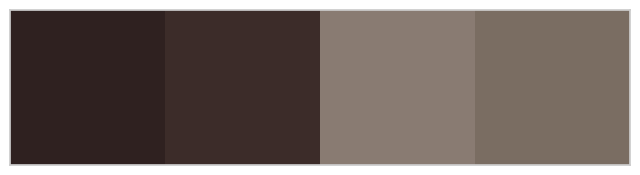

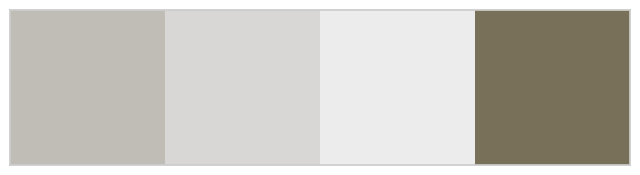

4438 [[192, 189, 183], [216, 215, 213], [236, 236, 236], [120, 112, 89]]


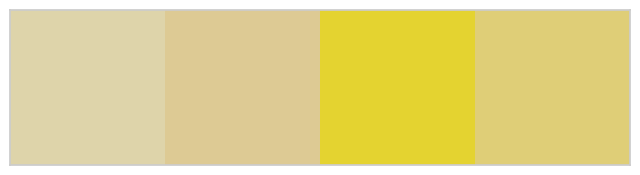

6928 [[222, 212, 170], [221, 202, 148], [228, 211, 48], [223, 206, 119]]


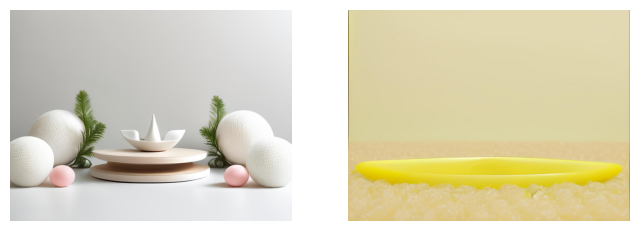

Label: 1 / Number of template: 586


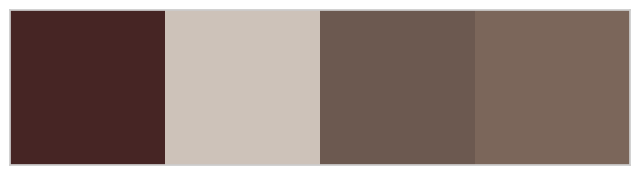

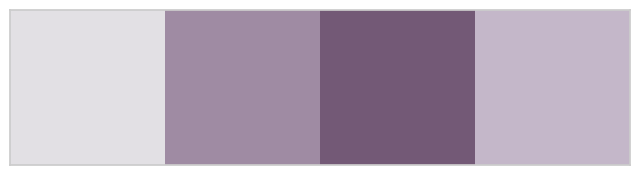

1430 [[226, 224, 228], [159, 139, 163], [115, 89, 118], [196, 183, 201]]


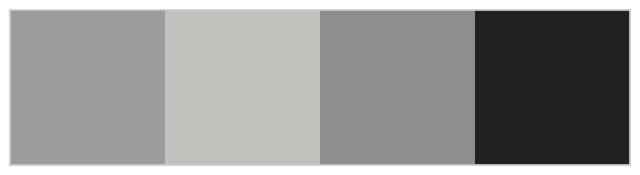

6904 [[156, 156, 158], [193, 193, 190], [142, 140, 141], [33, 33, 34]]


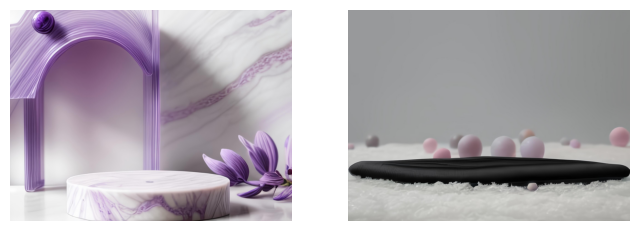

Label: 3 / Number of template: 812


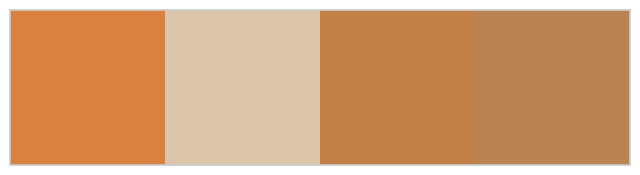

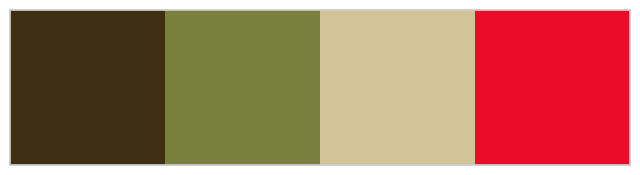

5213 [[62, 46, 18], [121, 127, 60], [210, 196, 152], [234, 11, 40]]


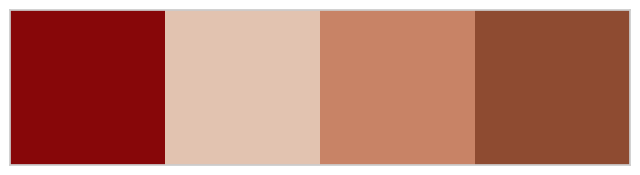

5646 [[135, 7, 9], [226, 195, 176], [200, 131, 102], [142, 75, 49]]


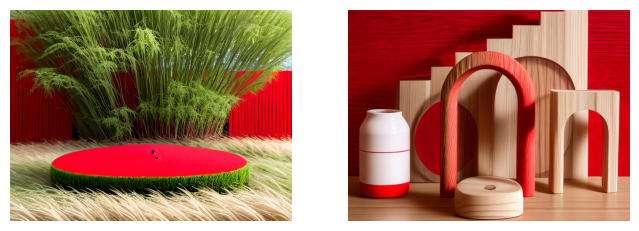

Label: 6 / Number of template: 917


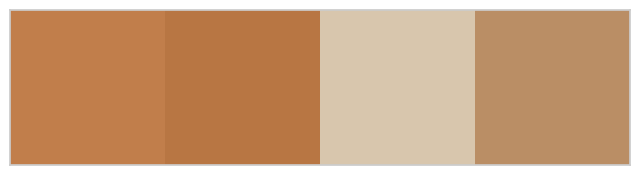

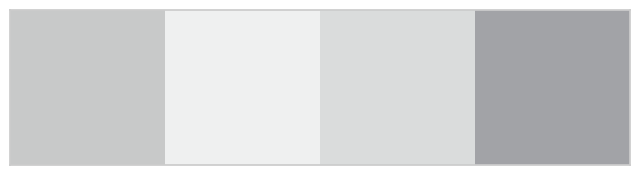

5849 [[200, 201, 201], [239, 240, 240], [218, 220, 220], [162, 163, 167]]


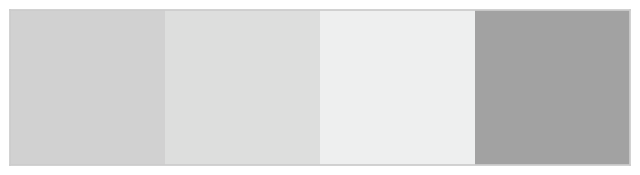

1255 [[209, 209, 209], [221, 222, 221], [238, 239, 239], [162, 162, 162]]


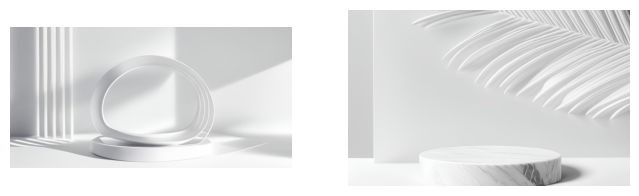

In [50]:
import random
label_centroids = clustering.cluster_centers_

for dict_key in label_template_dict:

    print(f"Label: {dict_key} / Number of template: {len(label_template_dict[dict_key])}")
    selected_template_ids = random.choices(label_template_dict[dict_key], k=2)
    visualize_rgb_colors(label_centroids[dict_key].reshape(4,3))
    
    for template_id in selected_template_ids:
        visualize_rgb_colors(colors[template_id-1])
        print(template_id, colors[template_id-1])
    visualize_n_templates(selected_template_ids)
    # break

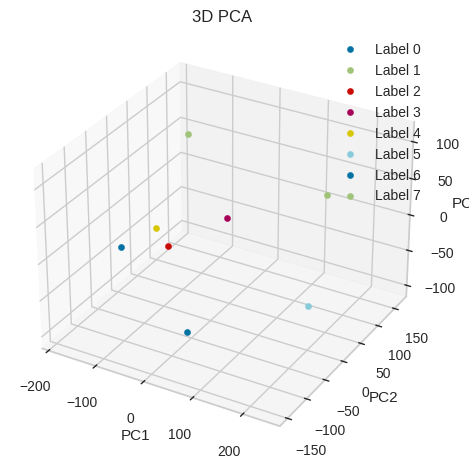

In [52]:
plot_3D_PCA(label_centroids, range(0,cluster_num))

In [53]:
centroids_label_color_map = dict(zip(range(0,cluster_num), label_centroids))

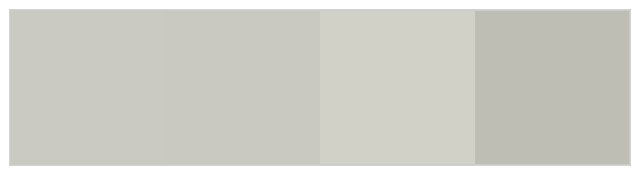

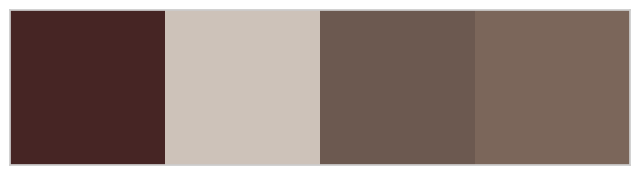

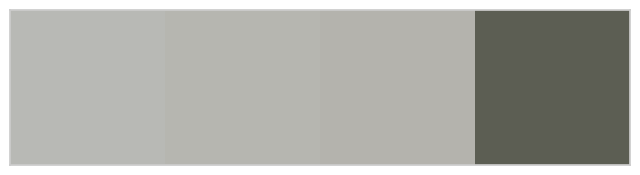

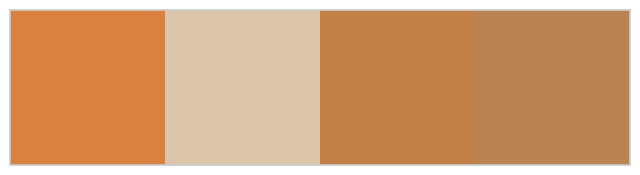

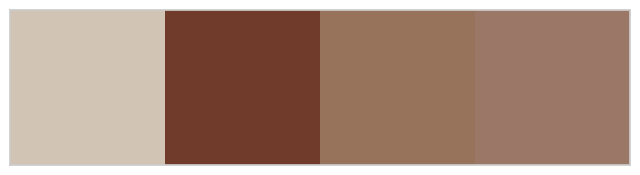

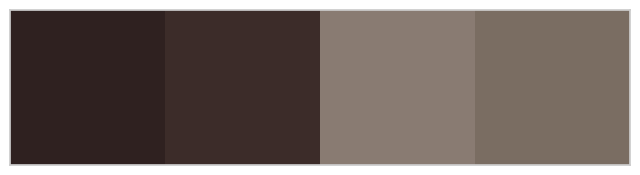

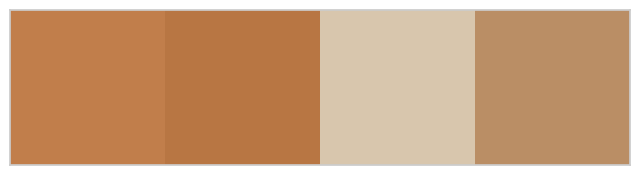

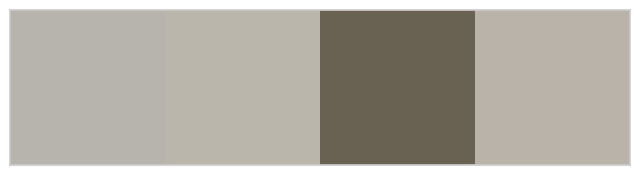

In [54]:
for label_key in centroids_label_color_map:
    visualize_rgb_colors(centroids_label_color_map[label_key].reshape(4,3))